<a href="https://colab.research.google.com/github/MohitNaren/ML/blob/main/ml5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRADIENT DESCENT



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/ML_DATASETS/Copy of house_price_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Separate numerical and categorical columns
nums_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

# Imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values
df[nums_cols] = num_imputer.fit_transform(df[nums_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output =False)
encoded_array = encoder.fit_transform(df[cat_cols])

# Create DataFrame with encoded column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_cols), index=df.index)

# Combine the original numerical data with encoded categorical data
df = pd.concat([df[nums_cols], encoded_df], axis=1)

In [12]:
x = df.drop('SalePrice', axis =1)
y = df['SalePrice']

In [13]:
print(df.isna().sum())
print(df.isna().sum().sum())
print(df.isna().any().any())

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 289, dtype: int64
0
False


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from math import sqrt
sgd_reg = SGDRegressor(max_iter=200)
sgd_reg.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_sgd)
print("SGD Regressor MSE:", mse)
print("RMSE:", sqrt(mse))

SGD Regressor MSE: 69886926996.99225
RMSE: 264361.3568526842


In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_scaled, y_train)

y_pred = sgd_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print(f"SGD Regressor MSE: {mse:.4f}")


SGD Regressor MSE: 562845014100.2073


Mean Squared Error: 34.709124595627884
Model Coefficients: [0.]



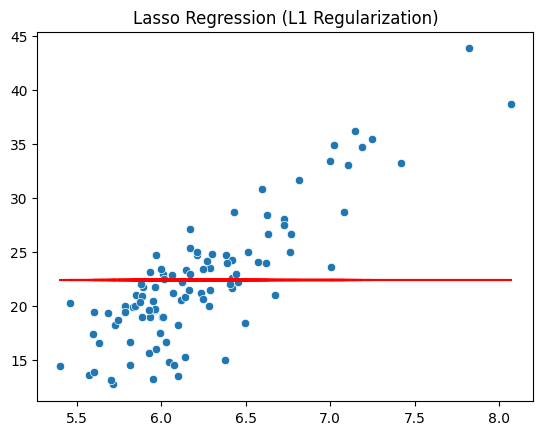

In [42]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)

# Select feature and target (first 100 rows)
X = df.loc[:100, 5].values.reshape(-1, 1)
y = df.loc[:100, 13].values  # 1D array

# Instantiate Lasso Regression model
lasso = Lasso(alpha=10)

# Train model
lasso.fit(X, y)

# Predict
y_pred = lasso.predict(X)

# Evaluate
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}\n")

# Plot
sns.scatterplot(x=X.flatten(), y=y)
plt.plot(X, y_pred, color="red")
plt.title("Lasso Regression (L1 Regularization)")
plt.show()


Mean Squared Error: 11.909263928425522
Model Coefficients: [7.2268529]



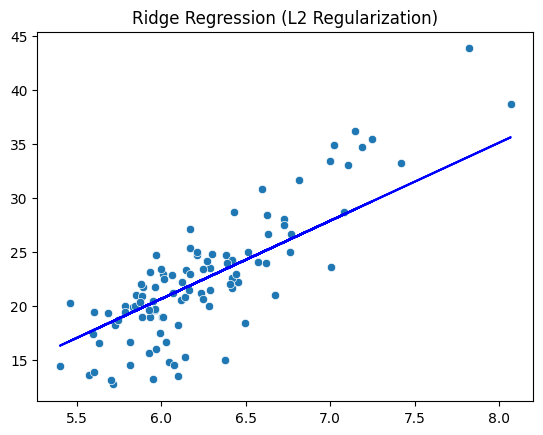

In [43]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)

# Select feature and target (first 100 rows)
X = df.loc[:100, 5].values.reshape(-1, 1)
y = df.loc[:100, 13].values  # 1D array

# Instantiate Ridge Regression model
ridge = Ridge(alpha=10)

# Train model
ridge.fit(X, y)

# Predict
y_pred = ridge.predict(X)

# Evaluate
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {ridge.coef_}\n")

# Plot
sns.scatterplot(x=X.flatten(), y=y)
plt.plot(X, y_pred, color="blue")
plt.title("Ridge Regression (L2 Regularization)")
plt.show()
